<a href="https://colab.research.google.com/github/parkmicheal1114/Python_Quest/blob/main/DLthon/Dog_and_Cat_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library



In [ ]:
import numpy as np
import sys
import tensorflow as tf
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import itertools
import plotly.express as px

# Extracting File & Setting Path

In [ ]:
import zipfile

zip_paths = ['/content/drive/MyDrive/Colab Notebooks/study_dataset/dogs-vs-cats/train.zip' , '/content/drive/MyDrive/Colab Notebooks/study_dataset/dogs-vs-cats/test1.zip']  # 압축 파일의 경로와 파일명
extract_dir = './content/dogs-vs-cats/'  # 압축 해제할 폴더의 경로와 이름

for zip_path in zip_paths:
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall(extract_dir)

In [ ]:
os.listdir('./content/dogs-vs-cats/')  # 생성 폴더 확인.

['train', 'test1']

In [ ]:
# train 폴더 확인
train_folder_path = './content/dogs-vs-cats/train'

train_file_names = os.listdir(train_folder_path)
print("train file name" , train_file_names[:5] )
print("train file numbers" , len(train_file_names))

train file name ['cat.10600.jpg', 'cat.6545.jpg', 'cat.9254.jpg', 'dog.7384.jpg', 'cat.2704.jpg']
train file numbers 25000


In [ ]:
# test 폴더 확인
test_folder_path = './content/dogs-vs-cats/test1'

test_file_names = os.listdir(test_folder_path)
print("test file name" , test_file_names[:5] )
print("test file numbers" , len(test_file_names))

test file name ['4816.jpg', '11279.jpg', '10006.jpg', '3756.jpg', '7137.jpg']
test file numbers 12500


# EDA

 - 간단한 클래스의 종류와 개수 , 파일 size 등을 확인 해 보고자 한다.

In [ ]:
# Train Data
from PIL import Image

targets = []
full_paths = []
train_cats_dir = []
train_dogs_dir = []
image_width = []
image_height = []

# Target setting
for file_name in train_file_names:
    target = file_name.split(".")[0] # target name
    full_path = os.path.join(train_folder_path, file_name)

    if(target == "dog"):
        train_dogs_dir.append(full_path)
    if(target == "cat"):
        train_cats_dir.append(full_path)

    full_paths.append(full_path)
    targets.append(target)

# image size info
for file_name in os.listdir(train_folder_path):
  if file_name.endswith('.jpg'):
    image_path = os.path.join(train_folder_path, file_name)
    with Image.open(image_path) as img:
        width, height = img.size
        image_width.append(width)
        image_height.append(height)

df_train = pd.DataFrame()
df_train['image_path'] = full_paths
df_train['target'] = targets
df_train['image_width'] = image_width
df_train['image_height'] = image_height

In [ ]:
df_train.head(5)

image_path target  image_width  \
0  ./content/dogs-vs-cats/train/cat.10600.jpg    cat          400   
1   ./content/dogs-vs-cats/train/cat.6545.jpg    cat          500   
2   ./content/dogs-vs-cats/train/cat.9254.jpg    cat          499   
3   ./content/dogs-vs-cats/train/dog.7384.jpg    dog          399   
4   ./content/dogs-vs-cats/train/cat.2704.jpg    cat          188   

   image_height  
0           299  
1           374  
2           333  
3           299  
4           280

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_path    25000 non-null  object
 1   target        25000 non-null  object
 2   image_width   25000 non-null  int64 
 3   image_height  25000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 781.4+ KB


## Train Data Class

Total class 개수 :  25000
dog class 개수 :  12500
cat class 개수 :  12500


<Axes: xlabel='target', ylabel='count'>

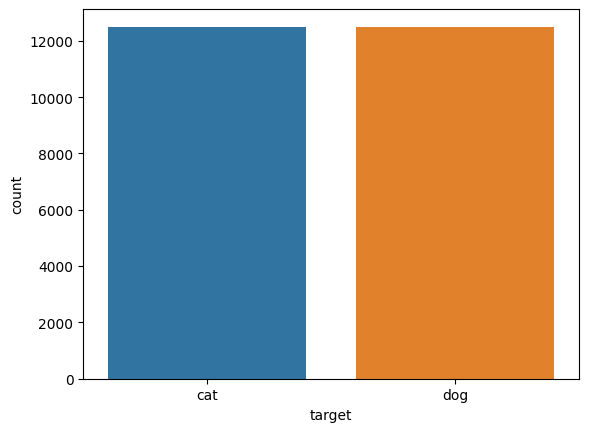

In [ ]:
import seaborn as sns

print('Total class 개수 : ' , len(df_train.target))
print ('dog class 개수 : '  , (df_train.target == 'dog').sum())
print ('cat class 개수 : '  , (df_train.target == 'cat').sum())

sns.countplot(df_train , x = 'target' )

## Image size Distribution

 - 이미지의 size 균일한지 아니면 각기 다른지 확인 하고 싶었다.

In [ ]:
px.histogram(df_train , x = 'image_width' , color = 'target')

In [ ]:
px.histogram(df_train , x = 'image_height', color = 'target')

- 큰 이미지를 작게 조정하는 경우, 이미지의 해상도가 낮아지면서 일부 정보가 손실될 수 있다. 하지만, 이미지의 크기가 작아지므로 학습 시간이 더 짧아질 수 있다.

- 반면에, 작은 이미지를 크게 조정하는 경우, 이미지의 해상도가 높아져서 더 많은 정보를 포함할 수 있다. 하지만, 이미지의 크기가 커지므로 학습 시간이 더 오래 걸릴 수 있다.

- 이에 이미지 사이즈 와 학습 성능과 관련된 테스트를 진행해 보고자 한다.

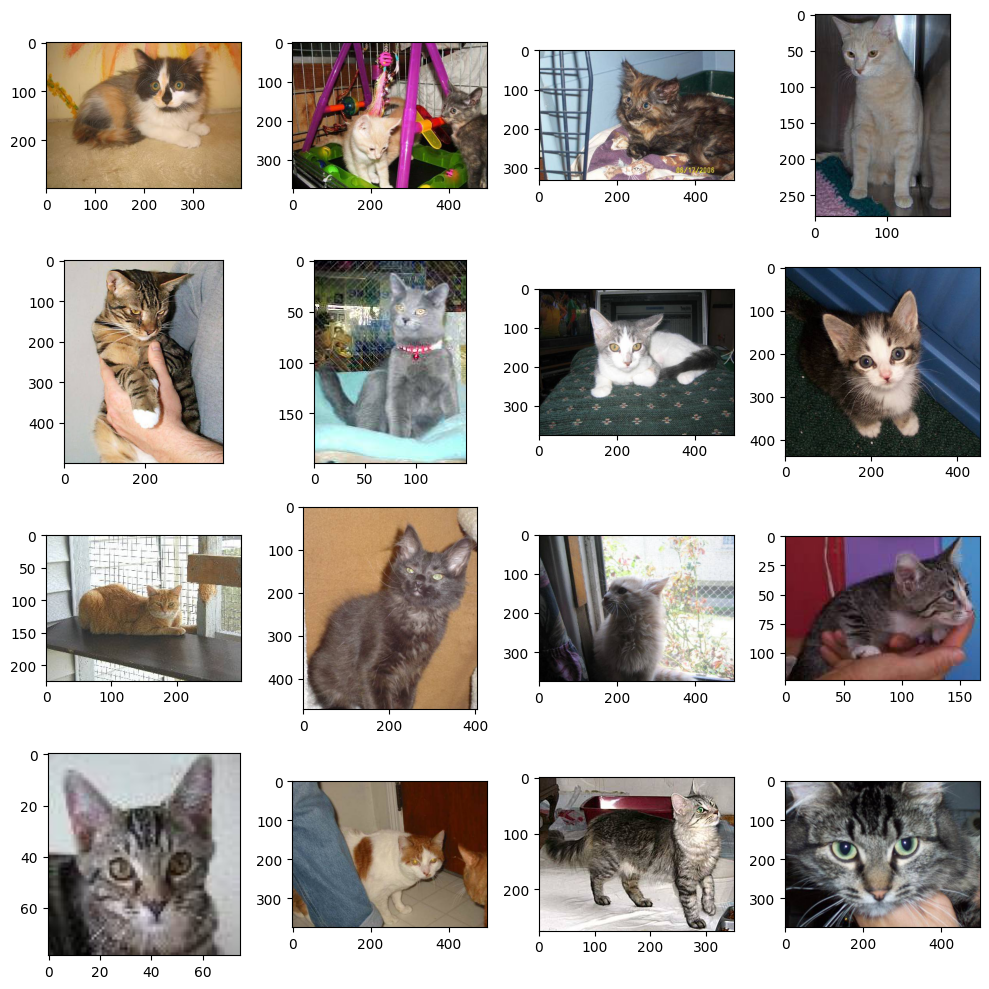

In [ ]:
 # Train Data 'Cat' Class

import matplotlib.image as img

rows = 4
cols = 4
axes = []
fig=plt.figure(figsize=(10,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_cats_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

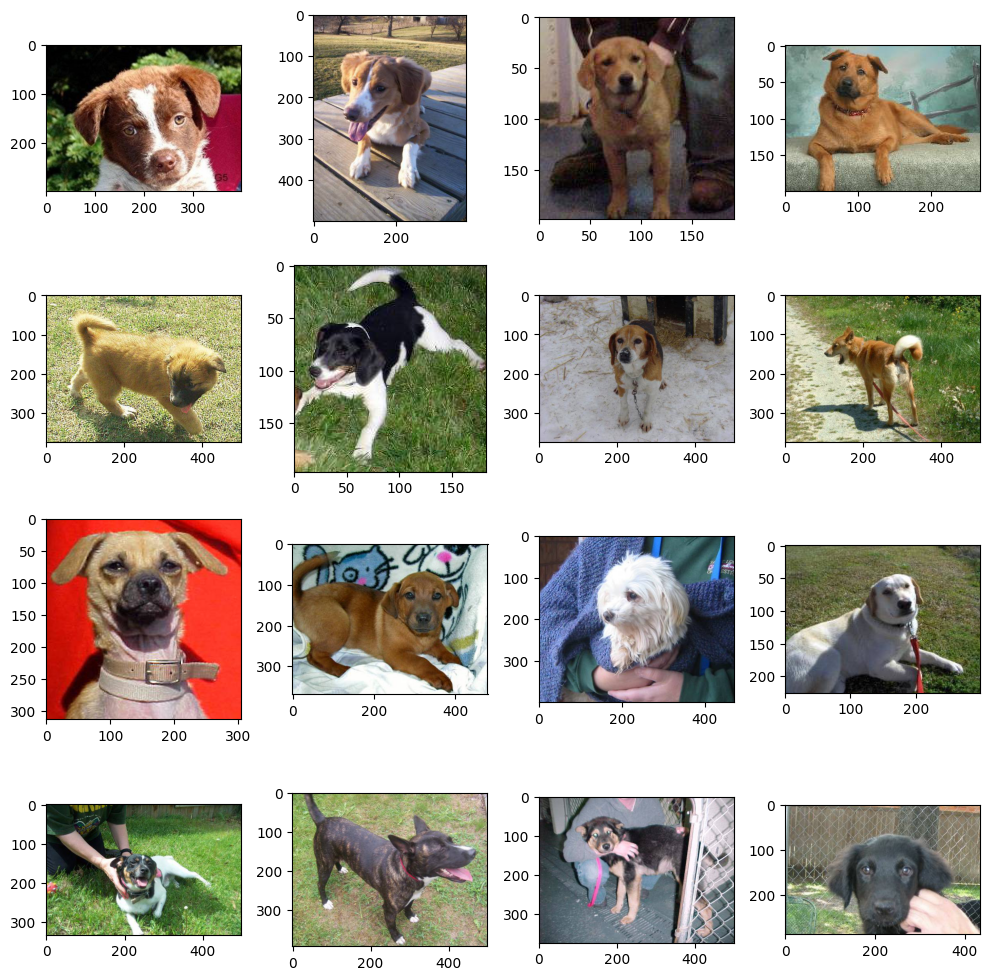

In [ ]:
# Train Data 'dog' Class

rows = 4
cols = 4
axes = []
fig=plt.figure(figsize=(10,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

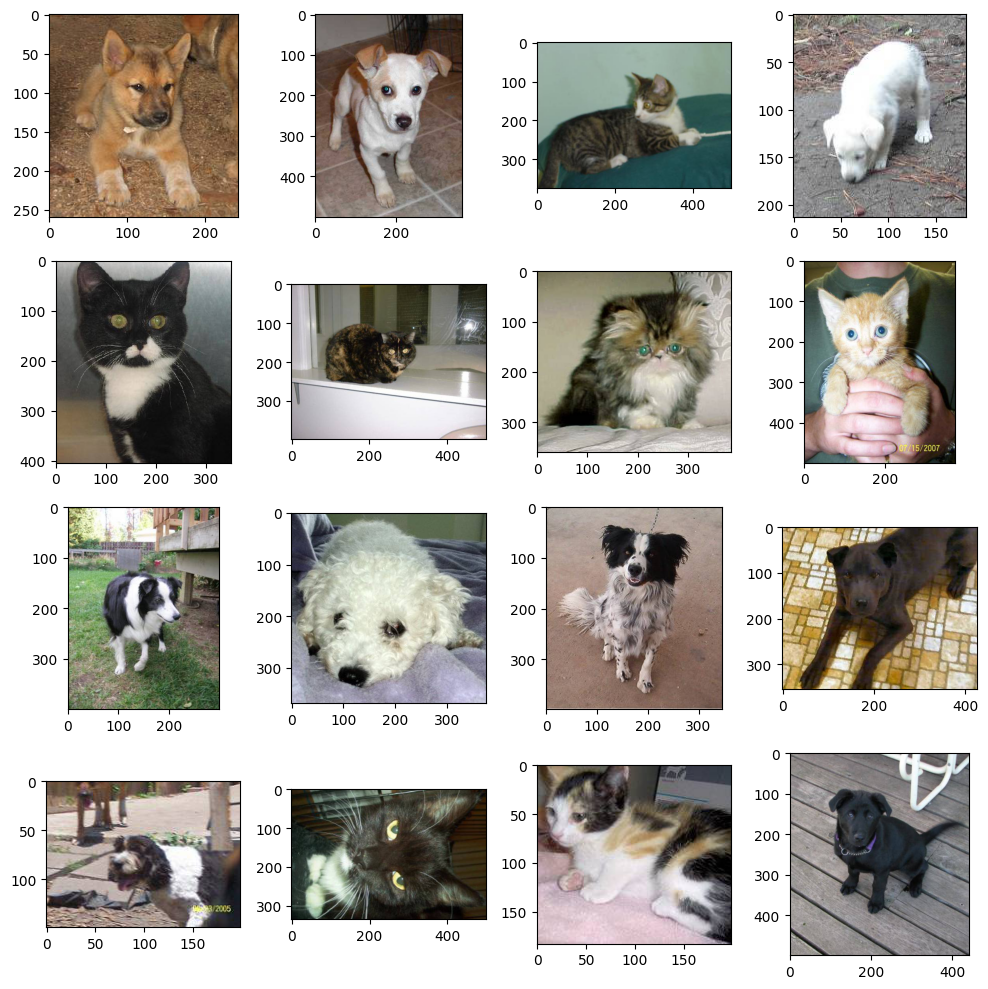

In [ ]:
# Test Data imshow
test_folder_path = './content/dogs-vs-cats/test1'

test_dir =[]
# Target setting
for file_name in test_file_names:
    path = os.path.join(test_folder_path, file_name)
    test_dir.append(path)


rows = 4
cols = 4
axes = []
fig=plt.figure(figsize=(10,10))
i = 0

for a in range(rows*cols):
    b = img.imread(test_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()


 ## EDA 고찰
 - Train Data 의 개수는 : 25,000 개 이며 각 클래스는 12,500개씩 고르게 분포 되어 있다.

 - Test Data 의 개수는 : 12,500 개 이며 , Labeling 이 되어 있지 않다. ( mission 검증용 )

 - 이미지를 확인해 보면 'Dog' 과 'Cats' 만 나와 있는 이미지만 있는 것이 아니라 다른 객체와 같이 있는 이미지도 확인이 되며 , 다수의 상황에서 찍힌 이미지 라는 것을 알수 있다.  


- Train Data의 Image size는 균일 하지 않다 . 이와 관련해서 1,000 장 정도의 이미지를 CNN 으로 학습을 진행 해 보면서 결과를 확인 해보고자 한다.

# Image Size 와 Performance 의 관계

 - 우선 위에서 확인 한 객체 중 가장 개수가 많은 image_Width가 500~504px 의 이미지를 뽑아서 , 같은 사이즈로 학습을 진행했을 때와 기존 이미지 에서 50% 정도 줄였을떄 각각 어떤 성능이 나오는지 확인 해보도록 한다.

## DATA 전처리

## DATA sample 추출

 - 이미지 size 에 따른 학습 성능을 확인 하기 위해서 2,000ea의 학습용 데이터 와 , 이를 검증 하기 위한 200ea의 검증 데이터를 추출 한다.


In [ ]:
tmp_dog = df_train[df_train.target=='dog'][(df_train.image_width >= 495 ) & (df_train.image_width < 505)].iloc[:1000,]
tmp_cat = df_train[df_train.target=='cat'][(df_train.image_width >= 495 ) & (df_train.image_width < 505)].iloc[:1000,]

df_tmp = pd.concat([tmp_dog , tmp_cat] , axis = 0).reset_index()
df_tmp.target.value_counts()

<ipython-input-19-872f225eb037>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-19-872f225eb037>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



dog    1000
cat    1000
Name: target, dtype: int64

  - 검증에 사용할 test 이미지는 학습에 사용하지 않은 이미지 를 추출 하였다.

In [ ]:
df_tmp_test = df_train[~((df_train.image_width >= 495 ) & (df_train.image_width < 505))].iloc[:200]
df_tmp_test.head()

image_path target  image_width  \
0  ./content/dogs-vs-cats/train/cat.10600.jpg    cat          400   
3   ./content/dogs-vs-cats/train/dog.7384.jpg    dog          399   
4   ./content/dogs-vs-cats/train/cat.2704.jpg    cat          188   
5   ./content/dogs-vs-cats/train/dog.6978.jpg    dog          370   
6   ./content/dogs-vs-cats/train/dog.4536.jpg    dog          192   

   image_height  
0           299  
3           299  
4           280  
5           500  
6           199

## Data Split

In [ ]:
train_data , val_data = train_test_split(df_tmp, test_size=0.2, random_state=123)

학습 데이터 개수  1600
검증 데이터 개수  400


<Axes: xlabel='target', ylabel='count'>

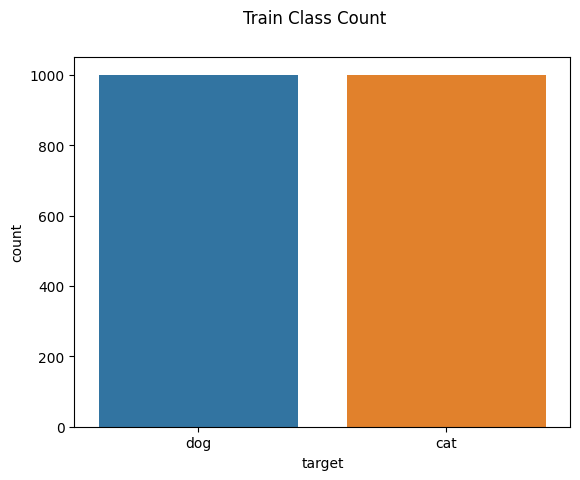

In [ ]:
print('학습 데이터 개수 ' , len(train_data))
print('검증 데이터 개수 ' , len(val_data))

plt.suptitle('Train Class Count')
sns.countplot(data = df_tmp , x='target')

## Image 사이즈 (499 x 378) 의 조건에서 model 의 학습 성능.

In [ ]:
# 테스트 parameter Initialization
batch_size = 32
epochs = 15
IMG_HEIGHT = int(df_tmp.image_height.mean()) # 499px
IMG_WIDTH = int(df_tmp.image_width.mean()) # 378px

In [ ]:
# DataGenrator 를 사용해서 Train , Val , Test data 를 생성 하도록 한다.
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True)

train_data_gen = image_gen_train.flow_from_dataframe(batch_size = batch_size,
                                                     dataframe = train_data,
                                                     x_col = 'image_path',
                                                     y_col = 'target',
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)

val_data_gen = val_datagen.flow_from_dataframe(batch_size = batch_size,
                                                     dataframe = val_data,
                                                     x_col = 'image_path',
                                                     y_col = 'target',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_data_gen = test_datagen.flow_from_dataframe(batch_size = batch_size,
                                                     dataframe = df_tmp_test,
                                                     x_col = 'image_path',
                                                     y_col = 'target',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 1600 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [ ]:
# 생성된 데이터를 확인 위한 함수 정의
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

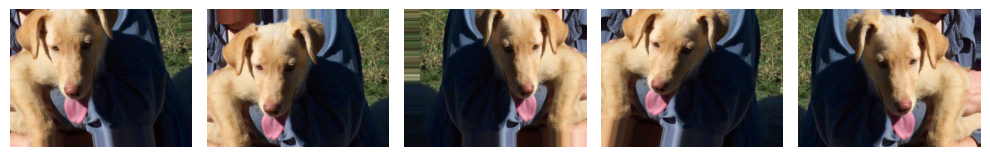

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

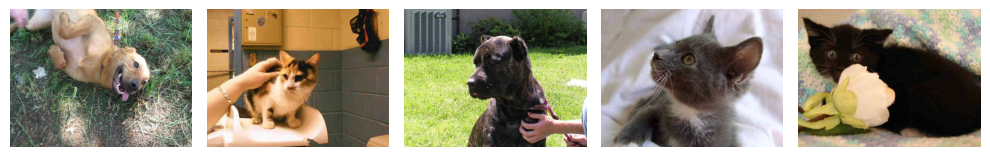

In [ ]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

### Model Build

In [ ]:
# test 를 위한 CNN 구현
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

history = model.fit(
    train_data_gen,
    steps_per_epoch= train_data.shape[0]/batch_size,
    validation_steps= val_data.shape[0]/batch_size,
    batch_size = batch_size,
    epochs = epochs,
    validation_data= val_data_gen)

Epoch 1/15
50/50 [==============================] - 90s 2s/step - loss: 0.6920 - accuracy: 0.5362 - val_loss: 0.6824 - val_accuracy: 0.5175
Epoch 2/15
50/50 [==============================] - 83s 2s/step - loss: 0.6546 - accuracy: 0.6187 - val_loss: 0.6690 - val_accuracy: 0.6000
Epoch 3/15
50/50 [==============================] - 83s 2s/step - loss: 0.6218 - accuracy: 0.6581 - val_loss: 0.6395 - val_accuracy: 0.6350
Epoch 4/15
50/50 [==============================] - 84s 2s/step - loss: 0.6136 - accuracy: 0.6531 - val_loss: 0.6323 - val_accuracy: 0.6400
Epoch 5/15
50/50 [==============================] - 85s 2s/step - loss: 0.5797 - accuracy: 0.6975 - val_loss: 0.6084 - val_accuracy: 0.6700
Epoch 6/15
50/50 [==============================] - 84s 2s/step - loss: 0.5604 - accuracy: 0.7031 - val_loss: 0.6078 - val_accuracy: 0.6675
Epoch 7/15
50/50 [==============================] - 83s 2s/step - loss: 0.5619 - accuracy: 0.7063 - val_loss: 0.6168 - val_accuracy: 0.6525
Epoch 8/15
50/50 [==

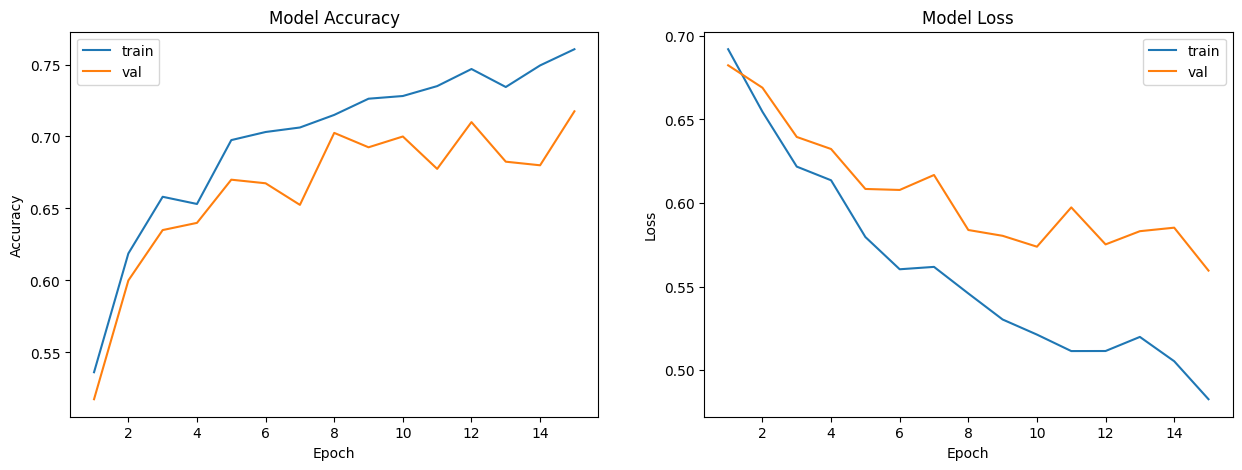

In [ ]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))

    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')

    axs[0].legend(['train', 'val'], loc='best')

    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')

    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

plot_model_history(history)

In [ ]:
# test data eval
pred = model.evaluate(test_data_gen , verbose = 1)

7/7 [==============================] - 2s 228ms/step - loss: 0.5563 - accuracy: 0.7450


## Image 사이즈 (256 x 256) 의 조건에서 model 의 학습 성능.

In [ ]:
# 테스트 parameter Initialization
batch_size = 32
epochs = 15
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [ ]:
# DataGenrator 를 사용해서 Train , Val , Test data 를 생성 하도록 한다.
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True)

train_data_gen = image_gen_train.flow_from_dataframe(batch_size = batch_size,
                                                     dataframe = train_data,
                                                     x_col = 'image_path',
                                                     y_col = 'target',
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)

val_data_gen = val_datagen.flow_from_dataframe(batch_size = batch_size,
                                                     dataframe = val_data,
                                                     x_col = 'image_path',
                                                     y_col = 'target',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_data_gen = test_datagen.flow_from_dataframe(batch_size = batch_size,
                                                     dataframe = df_tmp_test,
                                                     x_col = 'image_path',
                                                     y_col = 'target',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 1600 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [ ]:
# test 를 위한 CNN 구현
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

history = model.fit(
    train_data_gen,
    steps_per_epoch= train_data.shape[0]/batch_size,
    validation_steps= val_data.shape[0]/batch_size,
    batch_size = batch_size,
    epochs = epochs,
    validation_data= val_data_gen)

Epoch 1/15
50/50 [==============================] - 39s 704ms/step - loss: 0.6902 - accuracy: 0.5225 - val_loss: 0.6833 - val_accuracy: 0.5325
Epoch 2/15
50/50 [==============================] - 31s 612ms/step - loss: 0.6790 - accuracy: 0.5644 - val_loss: 0.6811 - val_accuracy: 0.5200
Epoch 3/15
50/50 [==============================] - 31s 615ms/step - loss: 0.6473 - accuracy: 0.6237 - val_loss: 0.6898 - val_accuracy: 0.5900
Epoch 4/15
50/50 [==============================] - 32s 647ms/step - loss: 0.6178 - accuracy: 0.6525 - val_loss: 0.6212 - val_accuracy: 0.6175
Epoch 5/15
50/50 [==============================] - 32s 635ms/step - loss: 0.5921 - accuracy: 0.6850 - val_loss: 0.6223 - val_accuracy: 0.6575
Epoch 6/15
50/50 [==============================] - 31s 618ms/step - loss: 0.5610 - accuracy: 0.7219 - val_loss: 0.6210 - val_accuracy: 0.6650
Epoch 7/15
50/50 [==============================] - 31s 616ms/step - loss: 0.5529 - accuracy: 0.7225 - val_loss: 0.6152 - val_accuracy: 0.6700

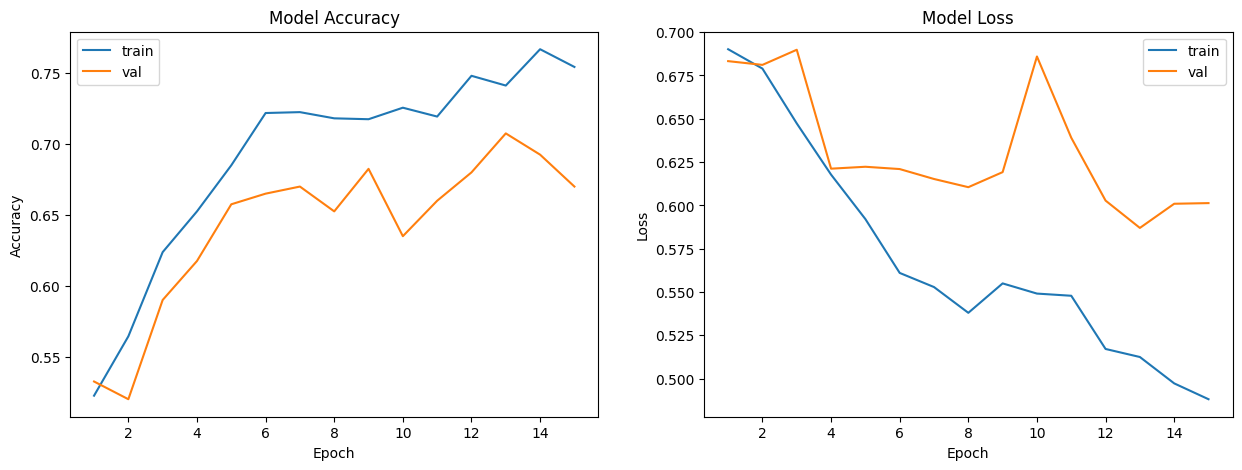

In [ ]:
plot_model_history(history)

In [ ]:
# test data eval
pred = model.evaluate(test_data_gen , verbose = 1)

7/7 [==============================] - 1s 137ms/step - loss: 0.5493 - accuracy: 0.7350


## Image 사이즈를 160x 160 으로 축소 했을때 .



In [ ]:
# 테스트 parameter Initialization
batch_size = 32
epochs = 15
IMG_HEIGHT = 160
IMG_WIDTH = 160

In [ ]:
# DataGenrator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True)

train_data_gen = image_gen_train.flow_from_dataframe(batch_size = batch_size,
                                                     dataframe = train_data,
                                                     x_col = 'image_path',
                                                     y_col = 'target',
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)

val_data_gen = val_datagen.flow_from_dataframe(batch_size = batch_size,
                                                     dataframe = val_data,
                                                     x_col = 'image_path',
                                                     y_col = 'target',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_data_gen = test_datagen.flow_from_dataframe(batch_size = batch_size,
                                                     dataframe = df_tmp_test,
                                                     x_col = 'image_path',
                                                     y_col = 'target',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 1600 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [ ]:
# test 를 위한 CNN 구현
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

history = model.fit(
    train_data_gen,
    steps_per_epoch= train_data.shape[0]/batch_size,
    validation_steps= val_data.shape[0]/batch_size,
    batch_size = batch_size,
    epochs = epochs,
    validation_data= val_data_gen)

Epoch 1/15
50/50 [==============================] - 20s 350ms/step - loss: 0.6922 - accuracy: 0.5069 - val_loss: 0.6807 - val_accuracy: 0.5800
Epoch 2/15
50/50 [==============================] - 18s 349ms/step - loss: 0.6658 - accuracy: 0.6112 - val_loss: 0.6761 - val_accuracy: 0.5725
Epoch 3/15
50/50 [==============================] - 17s 336ms/step - loss: 0.6416 - accuracy: 0.6112 - val_loss: 0.7282 - val_accuracy: 0.5850
Epoch 4/15
50/50 [==============================] - 20s 387ms/step - loss: 0.6213 - accuracy: 0.6444 - val_loss: 0.7250 - val_accuracy: 0.5775
Epoch 5/15
50/50 [==============================] - 17s 339ms/step - loss: 0.6033 - accuracy: 0.6775 - val_loss: 0.6478 - val_accuracy: 0.6425
Epoch 6/15
50/50 [==============================] - 18s 357ms/step - loss: 0.6055 - accuracy: 0.6631 - val_loss: 0.6386 - val_accuracy: 0.6300
Epoch 7/15
50/50 [==============================] - 18s 354ms/step - loss: 0.5810 - accuracy: 0.6925 - val_loss: 0.6355 - val_accuracy: 0.6450

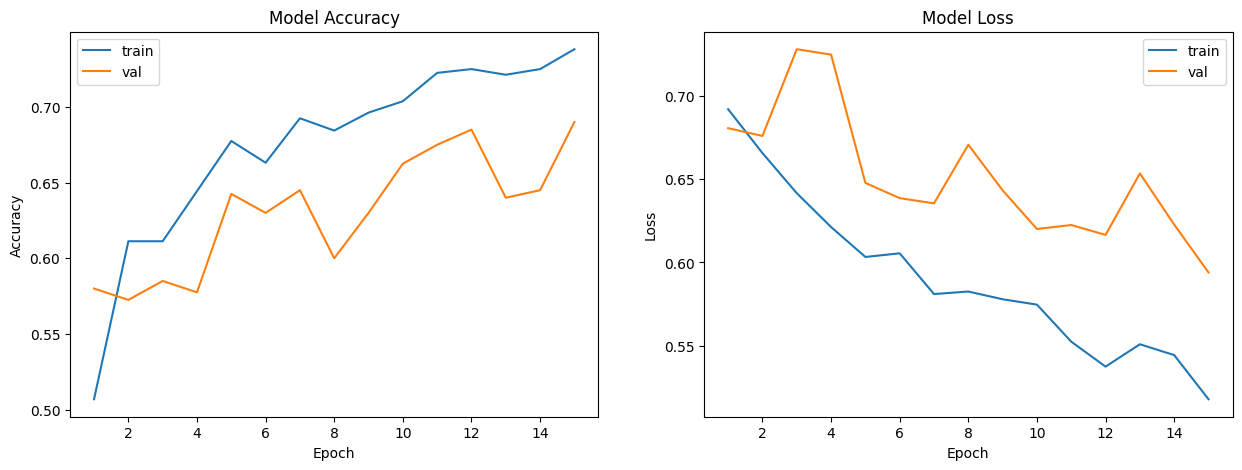

In [ ]:
plot_model_history(history)

In [ ]:
# test data eval
pred = model.evaluate(test_data_gen , verbose = 1)

7/7 [==============================] - 1s 105ms/step - loss: 0.5830 - accuracy: 0.6750


## 이미지 사이즈와 Model 학습의 성능 관련한 실험.

 - batch size = 32 , epoch = 10

 1. 첫번째 실험에서는 Image_width 가 495~500 사이에 있는 2000개의 이미지들 의 width / height 의 원이미지에 가장 근사한 499 x 379 의 사이즈가 적용 되었다.
  - 실험 시간 :  epoch 당 평균 85초 정도 소모 되었으며 , 총 학습 시간은 대략 27분( 1,620초 ) 정도 소요 되었다.

  - 검증 : loss: 0.5563 - accuracy: 0.7450

2. 두번째 실험에서는 원이미지 에서 256 x 256 으로 축소 하였다.

  - 실험 시간 :  epoch 당 평균 32초 정도 소모 되었으며 , 총 학습 시간은 대략 8분( 480 초 ) 정도 소요 되었다.

  - 검증 : loss: 0.5493 - accuracy: 0.7350

2. 세번째 실험에서는 이미지의 width / height 를 160x 160으로 축소 하였다.

  - 실험 시간 :  epoch 당 평균 18초 정도 소모 되었으며 , 총 학습 시간은 대략 4분 ( 240초 ) 정도 소요 되었다.

  - 검증 : loss: 0.5830 - accuracy: 0.6750

3. 고찰
 - 원본 과 유사한 사이즈를 가진 이미지의 픽셀수 : 189,121
 - 축소된 이미지(160 x 160 )의 픽셀수 : 25,600
 - 이미지가 축소 되면서 대략 86% 정도 픽셀수가 줄었들었으므로 대략 그 정도의 이미지가 손실 되었다고 볼수 있다.
 - 'accuracy' 지표를 확인 했을 때 ,  CNN 모델을 기준으로 보게 되면 이미지가 축소 시켰을 경우 정보의 손실이 나면서 성능이 크게 줄어 들었다, 하지만 학습시간은 대략 78% 정도 감소 시킬 수 있었다.

 - 하지만 (256 x 256) 이미지의 경우 1% 정도의 검증 accuracy 차이가 났지만 , 학습 시간은  70% 정도 감소 시킬수 있었다. ( 픽셀 감소 비율 : 50% )

 4. 실험 이미지 사이즈 선정.
  
  - 학습 시간이 늘어 난다는 것은 그 만큼 인프라 비용이 늘어 난다고 봐야 한다. 그렇기에 학습 시간 대비 모델의 성능 문제는 실험에 꼭 고려해야 하는 문제라고 생각 된다.

  - 앞에서 테스트에 체크 하지 못한 내용이 있을 수도 있다. 그렇지만 결과 만을 놓고 봤을때 학습 시간 대비 성능은 이미지 사이즈가 ( 256 x 256 ) 에서의 결과 였다.

  - 그렇기 때문에 이우 실험에서는 이미지 사이즈를 256 x 256 으로 고정 하여 학습에 사용하도록 하겠다.



In [ ]:
test_preds = model.predict(test_data_gen)

7/7 [==============================] - 1s 87ms/step


In [ ]:
# 모델 예측하기
predictions = model.predict(test_data_gen)

# 임계값 적용하기
predictions = (predictions > 0.5).astype(int)
df_tmp_test['pred']  = predictions

7/7 [==============================] - 2s 232ms/step


<ipython-input-80-1efe15b1f080>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 임계값 적용하기
predictions = (test_preds > 0.5).astype(int)
# confidence = round(100*(np.max(predictions[0])), 2)
# predicted_classes = np.argmax(test_preds, axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

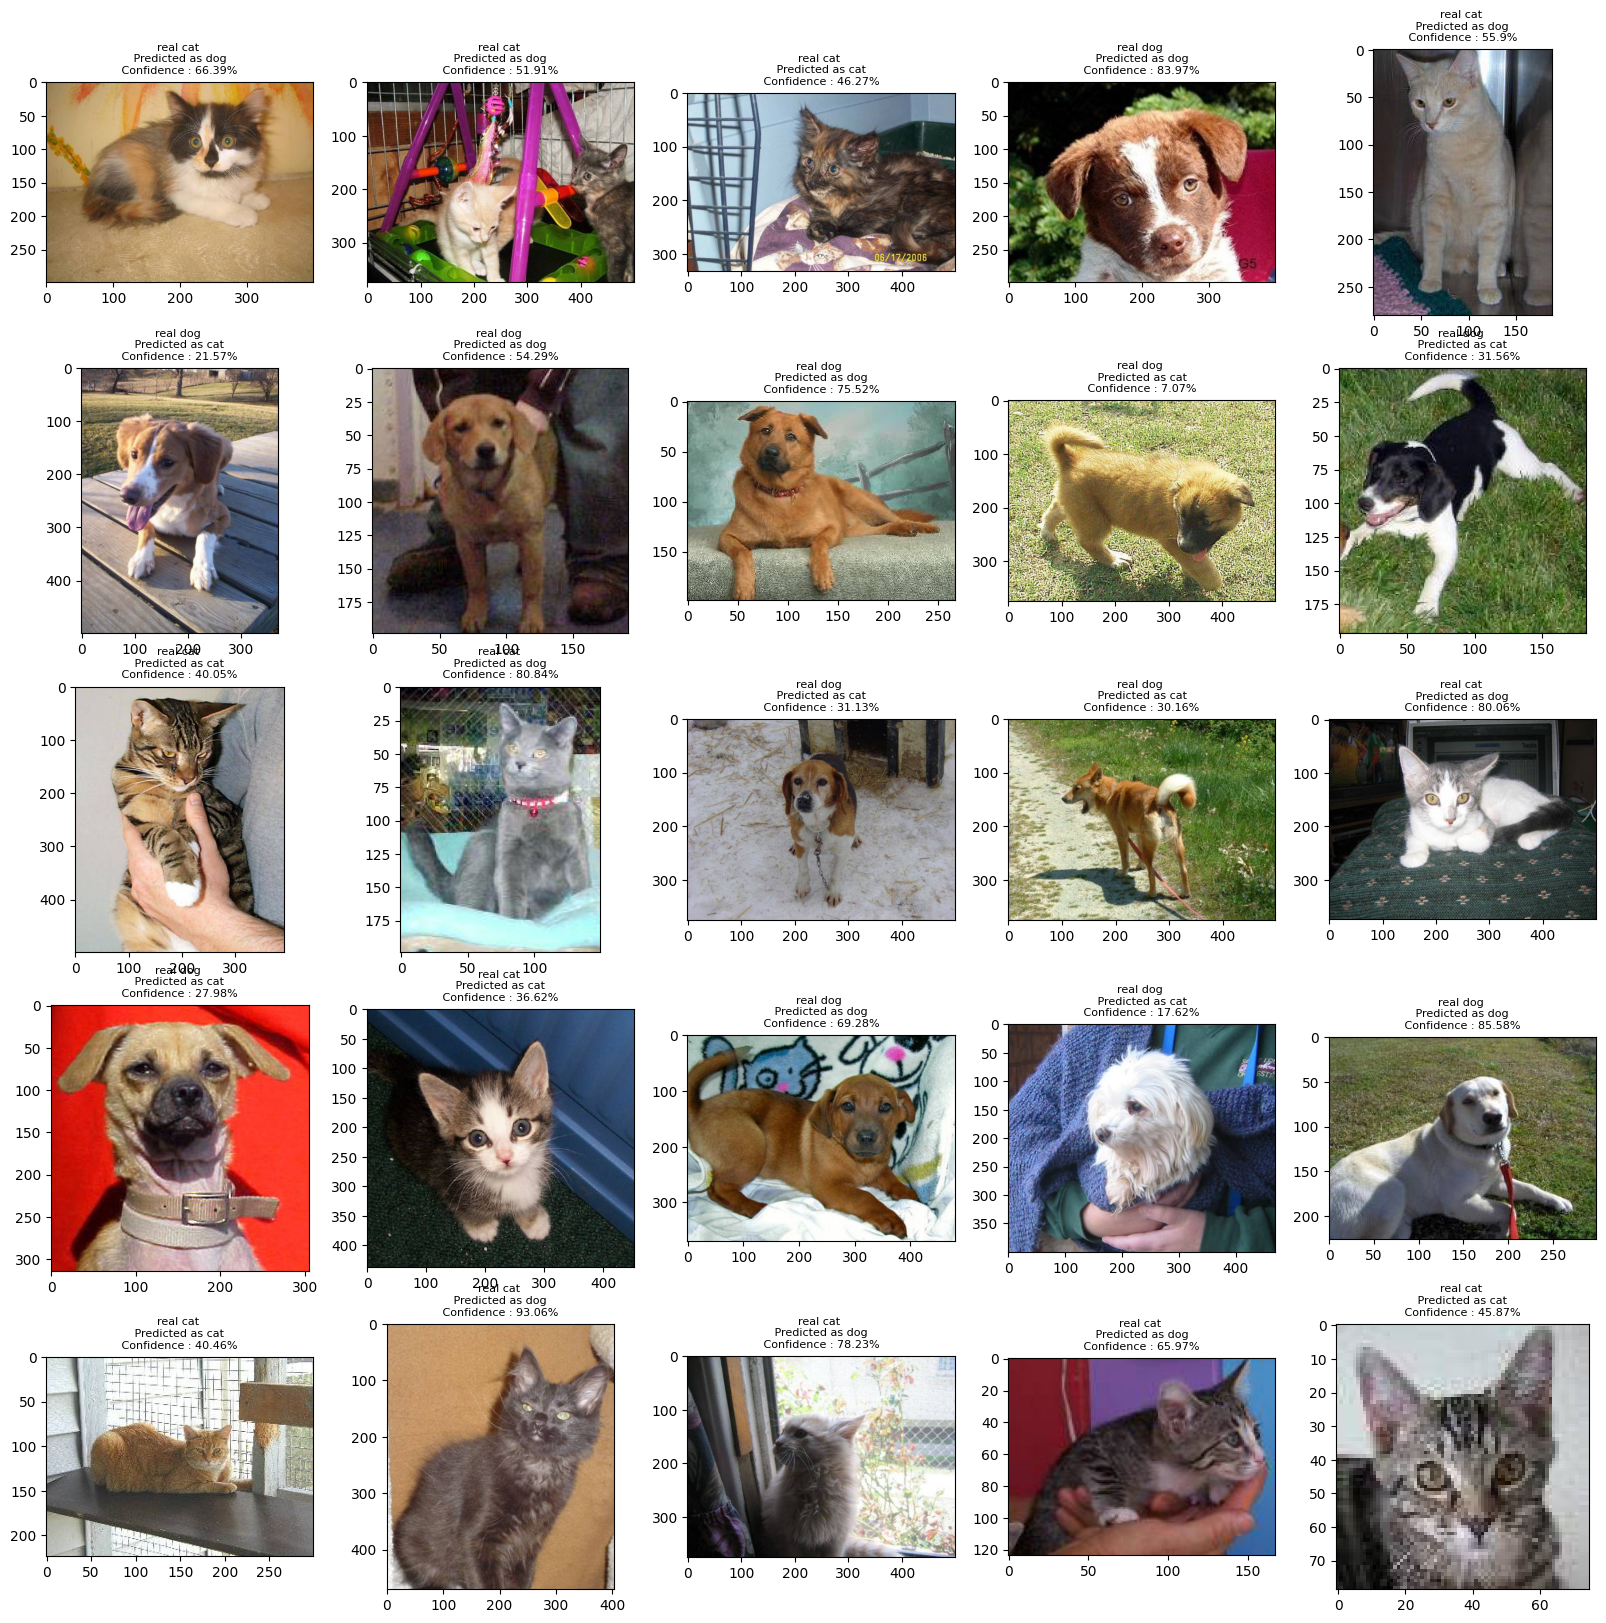

In [ ]:
fig = plt.figure(1, figsize=(20, 20))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(Image.open(df_tmp_test.image_path[i]))
    plt.title(f"real {df_tmp_test.target[i]} \n Predicted as {'dog' if predictions[i] == 1 else 'cat'} \n Confidence : {round(100*(np.max(test_preds[i])), 2)}% ", fontsize=8)

plt.tight_layout
plt.show


 - 이미지 Resize 에 대한 참조.

 ref : https://koreascience.kr/article/JAKO202022762159521.page(A Survey on Content Aware Image Resizing Methods)

 ref : bing